# 개발환경 세팅

In [ ]:
!pip install koreanize_matplotlib -q
import matplotlib.pyplot as plt
import koreanize_matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, root_mean_squared_log_error, r2_score


#데이터 불러오기

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/코드잇_데이터분석_6기/미션/미션14/test.csv', encoding = 'utf-8', on_bad_lines='skip')

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/코드잇_데이터분석_6기/미션/미션14/train.csv', encoding = 'utf-8', on_bad_lines='skip')

In [ ]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- 칼럼 정보

|컬럼명	|데이터 타입	|설명|
|------|---|---|
|datetime	|datetime	|자전거 대여 기록의 날짜 및 시간.|
|season	|int	|계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)|
|holiday	|int	|공휴일 여부 (0: 평일, 1: 공휴일)|
|workingday	|int	|근무일 여부 (0: 주말/공휴일, 1: 근무일)|
|weather	|int	|날씨 상황 (1: 맑음, 2: 구름낌/안개, 3: 약간의 비/눈, 4: 폭우/폭설)|
|temp	|float	|실측 온도 (섭씨)|
|atemp	|float	|체감 온도 (섭씨)|
|humidity	|int	|습도 (%)|
|windspeed	|float	|풍속 (m/s)|
|casual	|int	|등록되지 않은 사용자의 대여 수|
|registered	|int	|등록된 사용자의 대여 수|
|count	|int	|총 대여 수 (종속 변수)|

### 데이터 결측치 확인

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- null값 없음을 확인.

# 데이터 전처리

In [ ]:
train_df = df_train.copy()

In [ ]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

In [ ]:
train_df['hour'] = train_df['datetime'].dt.hour
train_df['week'] = train_df['datetime'].dt.dayofweek
train_df['month'] = train_df['datetime'].dt.month
train_df['year'] = train_df['datetime'].dt.year
train_df['date'] = train_df['datetime'].dt.date

In [ ]:
test_df = df_test.copy()

In [ ]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

In [ ]:
test_df['hour'] = test_df['datetime'].dt.hour
test_df['week'] = test_df['datetime'].dt.dayofweek
test_df['month'] = test_df['datetime'].dt.month
test_df['year'] = test_df['datetime'].dt.year
test_df['date'] = test_df['datetime'].dt.date

# EDA

## 시간대 별 자전거 대여 패턴

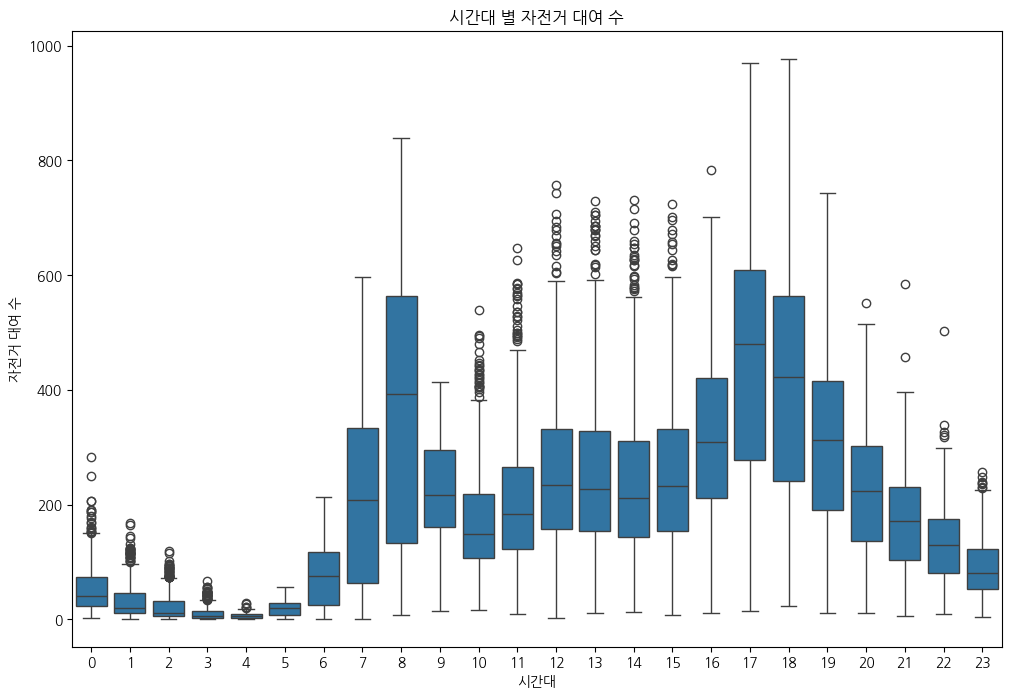

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = train_df, x='hour', y='count')
plt.title('시간대 별 자전거 대여 수')
plt.xlabel('시간대')
plt.ylabel('자전거 대여 수')
plt.show()

- 시간대 별로 시각화 하였을 때 8시, 17시에 대여수가 높은 것을 확인할 수 있음.

## 날씨 변수와 자전거 대여 수요 간의 상관관계

In [ ]:
weather_mapping = {1: '맑음',
                   2: '구름 낌/안개',
                   3: '약간의 비/눈',
                   4: '폭우/폭설'}

In [ ]:
train_df['wearher_map'] = train_df['weather'].map(weather_mapping)

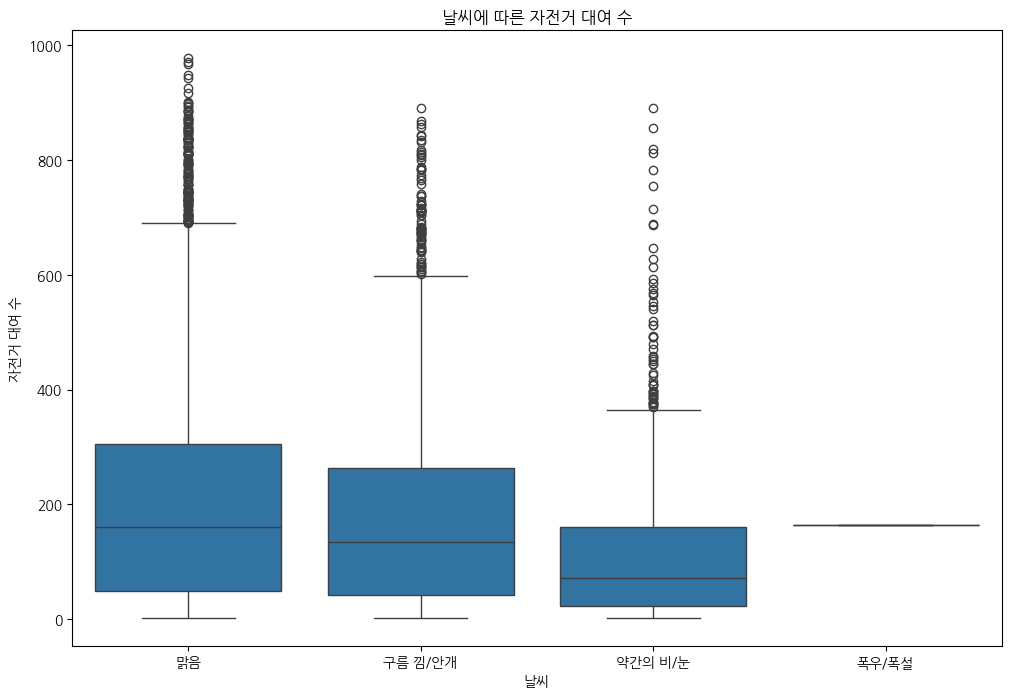

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = train_df, x='wearher_map', y='count')
plt.title('날씨에 따른 자전거 대여 수')
plt.xlabel('날씨')
plt.ylabel('자전거 대여 수')
plt.show()

- 야외에서 이용하는 것이다 보니 날씨의 영향을 크게 받은 것으로 보이며 날씨가 맑을 때 자전거 대여수가 가장 많았고 자전거를 이용하기 어려운 폭우/폭설에는 대여를 거의 하지 않음을 확인하였음

## 계절별 자전거 대여 패턴의 차이

In [ ]:
season_mapping = {1: '봄',
                  2: '여름',
                  3: '가을',
                  4: '겨울'}

In [ ]:
train_df['season_map'] = train_df['season'].map(season_mapping)

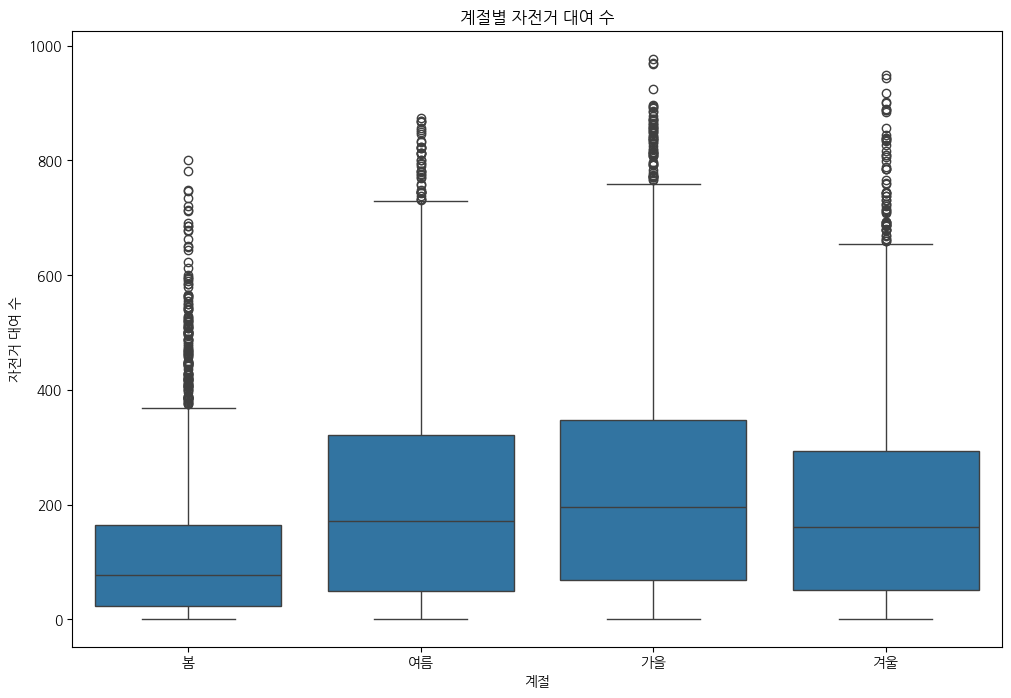

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = train_df, x='season_map', y='count')
plt.title('계절별 자전거 대여 수')
plt.xlabel('계절')
plt.ylabel('자전거 대여 수')
plt.show()

- 야외활동에 영향을 크게 미치는 여름과 겨울에 자전거 대여수가 더 적을 것으로 예상하였으나 의외로 가을 여름 겨울 순으로 높았으며 봄에 자전거 대여수가 다른 계절 대비 낮게 나온것을 확인하였다.

## 주말과 평일의 자전거 대여 수요 차이

In [ ]:
holiday_mapping = {0: '평일',
                   1: '공휴일'}

In [ ]:
train_df['holiday_map'] = train_df['holiday'].map(holiday_mapping)

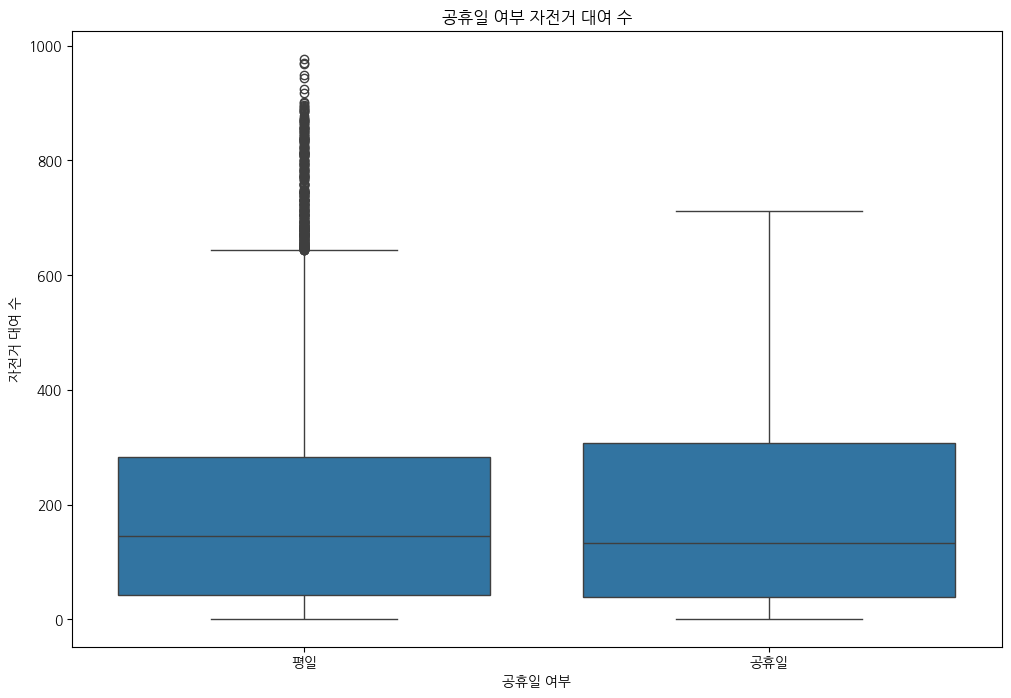

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = train_df, x='holiday_map', y='count')
plt.title('공휴일 여부 자전거 대여 수')
plt.xlabel('공휴일 여부')
plt.ylabel('자전거 대여 수')
plt.show()

- 평일대비 공휴일에 이용하는 수가 더 높았음을 확인하였다

### 시간대 별 자전거 대여수(평일)

In [ ]:
df_work = train_df.loc[train_df.holiday == 0, ['hour', 'count', 'holiday']]

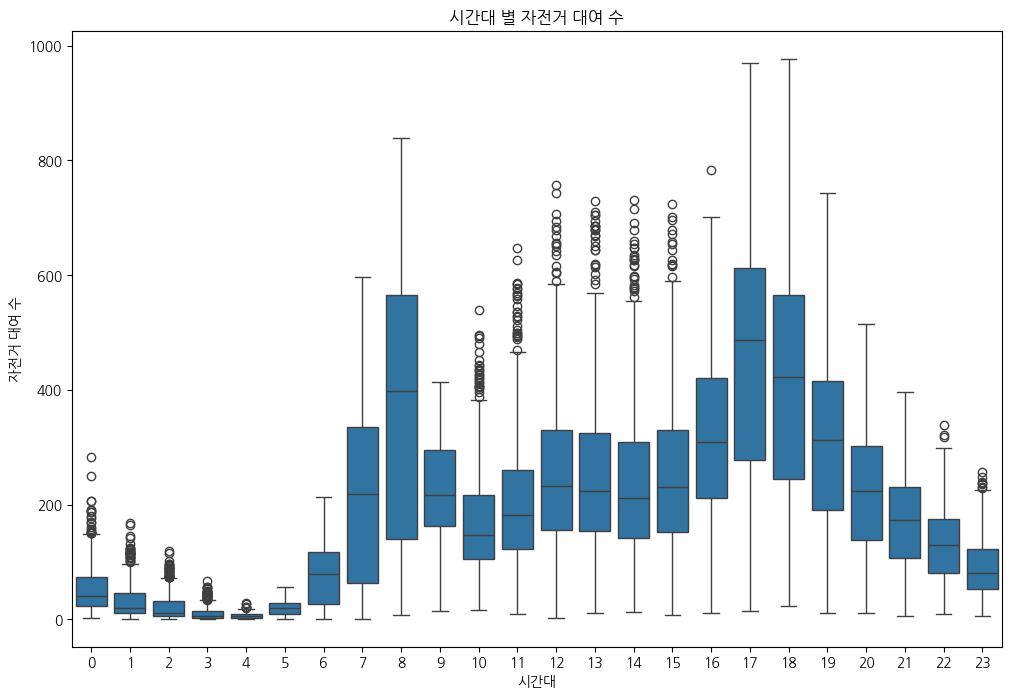

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = df_work, x='hour', y='count')
plt.title('시간대 별 자전거 대여 수')
plt.xlabel('시간대')
plt.ylabel('자전거 대여 수')
plt.show()

### 시간대 별 자전거 대여수(공휴일)

In [ ]:
df_holi = train_df.loc[train_df.holiday == 1, ['hour', 'count', 'holiday']]

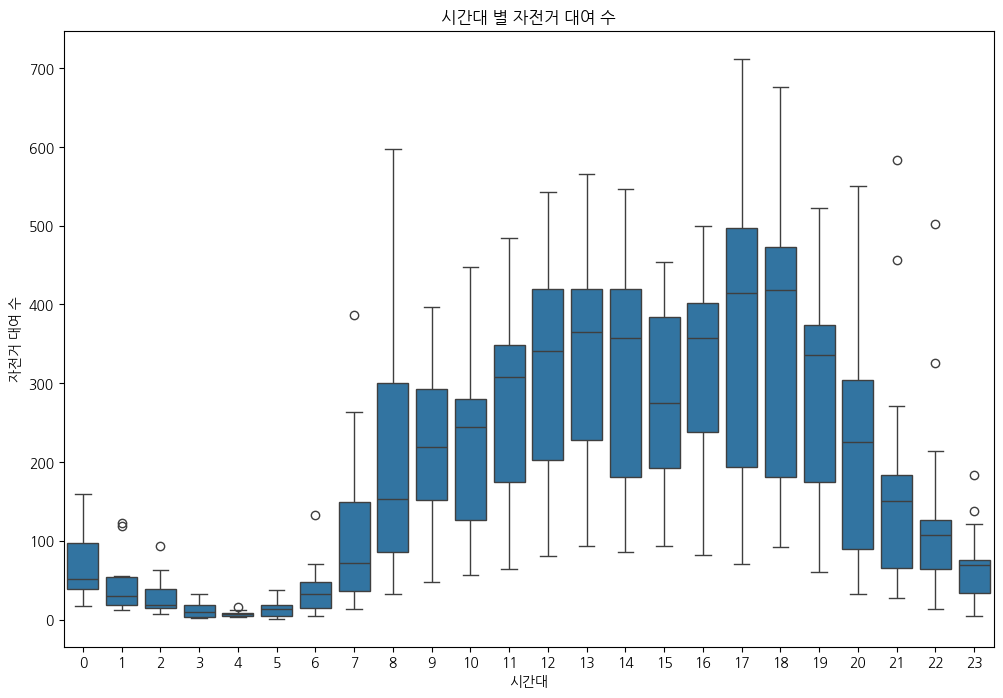

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = df_holi, x='hour', y='count')
plt.title('시간대 별 자전거 대여 수')
plt.xlabel('시간대')
plt.ylabel('자전거 대여 수')
plt.show()

##자전거 대여 수요를 예측하기위한 중요한 변수

- 여러 관점으로 데이터를 살펴본 결과 자전거를 대여하는 것에 대해 차이가 크게 보인 것이 평일과 공휴일에 따른 시간대별 대여 패턴이다.
- 자전거를 평일인지 공휴일인지에 따라 차이가 뚜렷하기에 예측하는 모델을 구축하는데 중요한 변수라 판단하였음.

## 자전거 대여 수요 예측 모델을 구축, 이를 기반으로 한 운영 전략

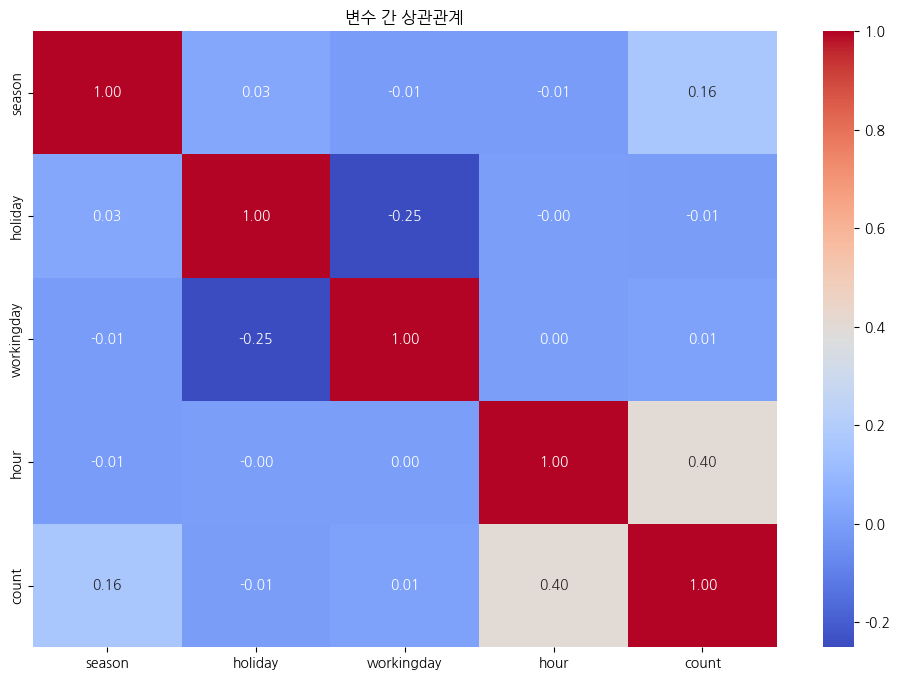

In [ ]:
corr_list = train_df[["season", "holiday", "workingday", "hour", "count"]]
plt.figure(figsize=(12, 8))
sns.heatmap(corr_list.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("변수 간 상관관계")
plt.show()

- target = count
    - 낮은 상관관계 : season(0.16)
    - 높은 상관관계 : hour, count(0.40)

- 히트맵 분석결과
    - 시간(hour)과 대여 건수(count) 간 상관관계가 가장 높은것을 확인 \
    이를 통해 특정 시간대 별로 수요 패턴이 뚜렷함을 의미함.
    - 계절(season) 또한 대여 건수와 양의 상관관계인 것을 확인 \
    계절별 수요 차이가 존재함을 의미함
    - 공휴일 여부(holiday)와는 약한 음의 상관관계인 것을 확인 \
    공휴일에는 대여 패턴이 일정하지 않음을 의미함.

### scaler

#### MInMaxScaler

In [ ]:
mm_scaler = MinMaxScaler()
train_features = mm_scaler.fit_transform(train_df[['hour', 'season']])

In [ ]:
train_features

array([[0.        , 0.        ],
       [0.04347826, 0.        ],
       [0.08695652, 0.        ],
       ...,
       [0.91304348, 1.        ],
       [0.95652174, 1.        ],
       [1.        , 1.        ]])

In [ ]:
 train_features = pd.DataFrame(train_features, columns=['hour', 'season'])

In [ ]:
 train_features.describe()

,hour,season
count,10886.000000,10886.000000
mean,0.501809,0.502205
std,0.300689,0.372058
min,0.000000,0.000000
25%,0.260870,0.333333
50%,0.521739,0.666667
75%,0.782609,1.000000
max,1.000000,1.000000


In [ ]:
# 피처와 타겟 설정
features = ['hour', 'season']  # 필요한 컬럼으로 수정
target = 'count'

X = train_df[features]
y = train_df[target]

X_test = test_df[features]  # test 데이터에는 타겟 없음

# 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 검증 데이터 예측
y_val_pred = model.predict(X_val)

# 검증 성능 평가
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print(' 검증 데이터 성능')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')
print(f'회귀계수: {model.coef_}')
print(f'절편: {model.intercept_}')

# 검증 예측값 샘플 확인
val_results = X_val.copy()
val_results['true_count'] = y_val
val_results['predicted_count'] = y_val_pred
print('\n✅ 검증셋 예측값 샘플')
print(val_results.head())

# 테스트 데이터 예측
y_test_pred = model.predict(X_test)

# 제출 파일 생성
submission = test_df.copy()
submission['count'] = y_test_pred
submission = submission[['datetime', 'count']]  # 제출 포맷에 맞게

print('\n 제출용 데이터 예측값 샘플')
print(submission.head())

✅ 검증 데이터 성능
RMSE: 164.01
R²: 0.19
회귀계수: [10.5544872  26.93974052]
절편: 2.147308497257285

✅ 검증셋 예측값 샘플
      hour  season  true_count  predicted_count
3133    11       3         127       199.065889
5786     6       1          13        92.413972
5224    18       4         163       299.887040
8953    10       3         233       188.511402
8054    23       2         222       298.779995

✅ 제출용 데이터 예측값 샘플
             datetime      count
0 2011-01-20 00:00:00  29.087049
1 2011-01-20 01:00:00  39.641536
2 2011-01-20 02:00:00  50.196023
3 2011-01-20 03:00:00  60.750511
4 2011-01-20 04:00:00  71.304998
